<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../")
# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import  soporte_ajuste_logistica as sal


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pickle
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from itertools import product , combinations
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

C:\Users\ruipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_pickle("../datos/datos_preprocesados.pkl")

# Regresion Logística

In [3]:
params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.005, 0.01,0.05, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10,20,40,100,150]
}

In [4]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent",train_size=0.8)

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression",param_grid = params_logistic,ruta_guardar_modelo="../datos/modelos-encoders/",nombre_modelo_guardar="logistic_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.005, 0.01, 0.05, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [10, 20, 40, 100, 150]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=0.1, max_iter=10, penalty='l1', random_state=42,
                   solver='saga')
-------------------------------------------------


### Matriz Logistica

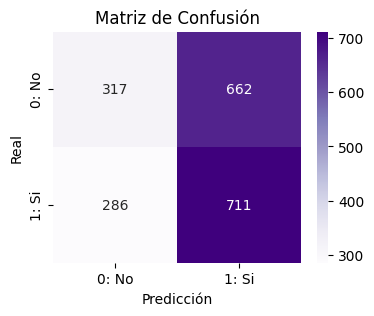

In [5]:
logistica.plot_matriz_confusion("logistic_regression",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [6]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,0.532903,0.535240,0.532903,0.512236,0.059146,0.542976
test,0.520243,0.521739,0.520243,0.501287,0.037068,0.531585


### Curva ROC

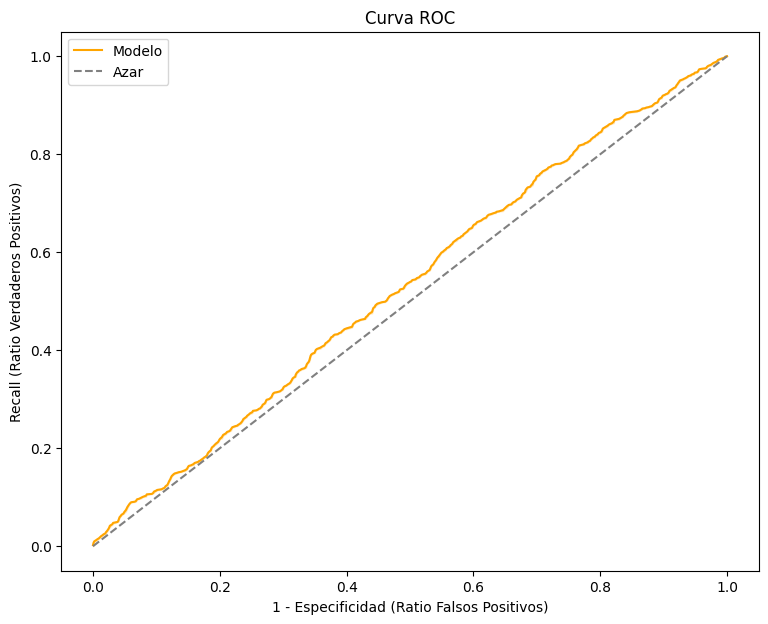

In [7]:
logistica.plot_curva_ROC()

### Importancia

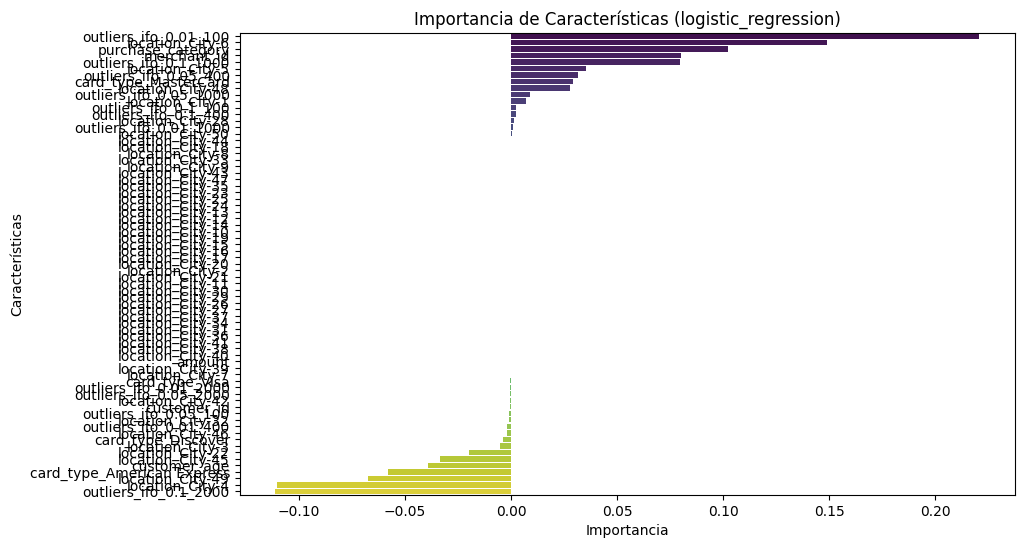

In [8]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

### Shap Plots

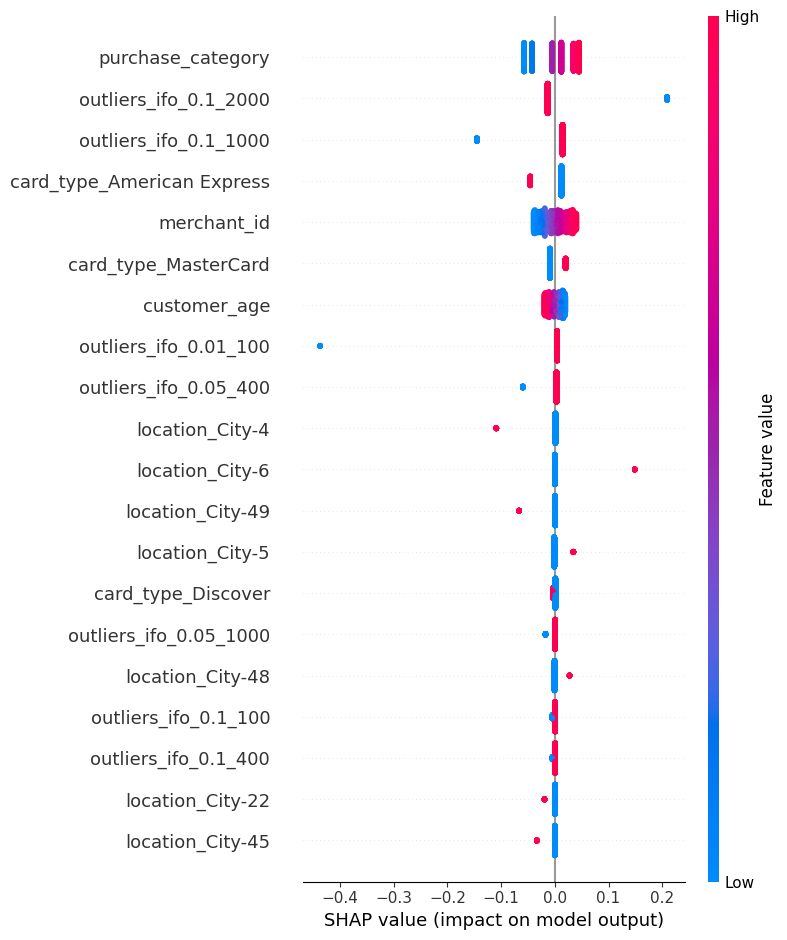

In [9]:
logistica.plot_shap_summary(modelo_nombre ='logistic_regression')

# Decision Tree

In [10]:
# instanciamos la clase de regresión logistica
decision_tree = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent",train_size=0.8)

# llamamos a la función para ajustar el modelo
decision_tree.ajustar_modelo("tree",ruta_guardar_modelo="../datos/modelos-encoders/",nombre_modelo_guardar="decision_tree_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=3, random_state=42)
-------------------------------------------------


### Matriz Logistica

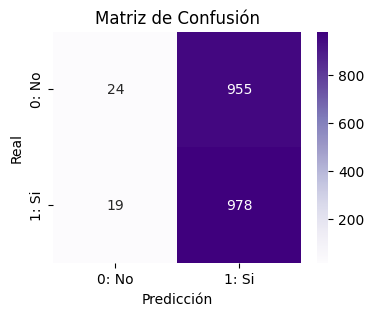

In [11]:
decision_tree.plot_matriz_confusion("tree",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [12]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = decision_tree.calcular_metricas(modelo_nombre =  "tree")
df_resultados.T

,accuracy,precision,recall,f1,kappa,auc
train,0.516831,0.595838,0.516831,0.372746,0.017519,0.524409
test,0.507085,0.531807,0.507085,0.360098,0.005505,0.514347


### Curva ROC

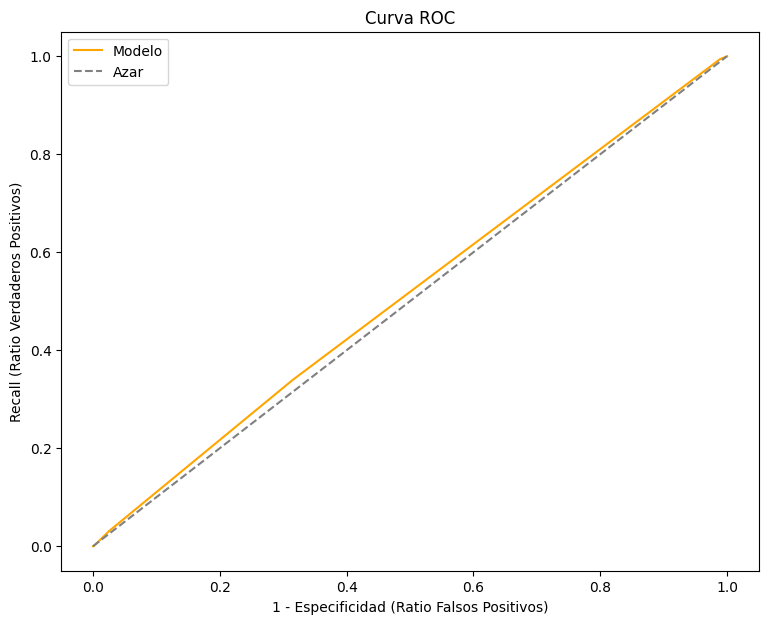

In [13]:
decision_tree.plot_curva_ROC()

### Importancia

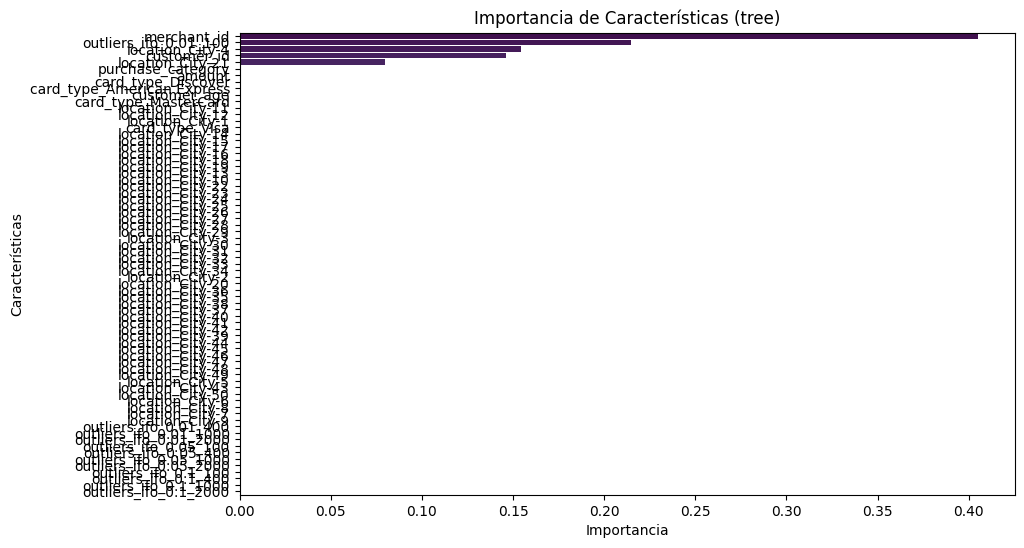

In [14]:
# Mostramos la importancia de los predictores en el modelo regresión logística
decision_tree.importancia_predictores(modelo_nombre ='tree')

### Shap Plots

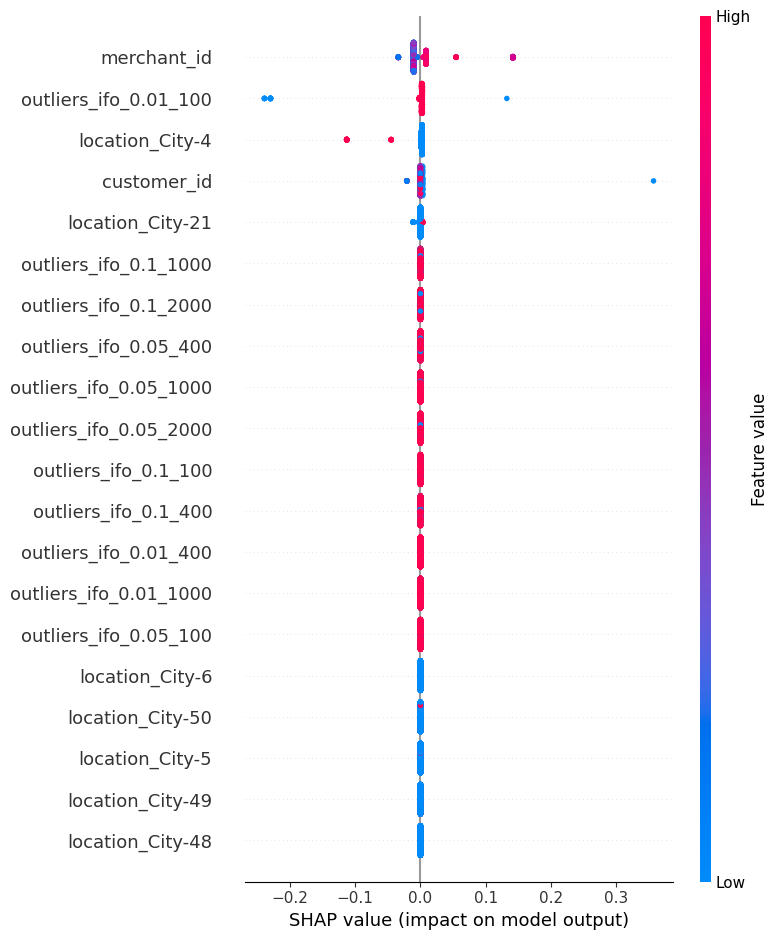

In [15]:
decision_tree.plot_shap_summary(modelo_nombre ='tree')

# Random Forest

In [ ]:
# instanciamos la clase de regresión logistica
random_forest = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent",train_size=0.8)

# llamamos a la función para ajustar el modelo
random_forest.ajustar_modelo("random_forest",ruta_guardar_modelo="../datos/modelos-encoders/",nombre_modelo_guardar="random_forest.pkl")

ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

### Matriz Logistica

In [ ]:
random_forest.plot_matriz_confusion("random_forest",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = random_forest.calcular_metricas(modelo_nombre = "random_forest")
df_resultados.T

### Curva ROC

In [ ]:
random_forest.plot_curva_ROC()

### Importancia

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
random_forest.importancia_predictores(modelo_nombre ='random_forest')

### Shap Plots

In [ ]:
random_forest.plot_shap_summary(modelo_nombre ='random_forest')

# Gradient Boosting

In [ ]:
# instanciamos la clase de regresión logistica
gradient_boosting = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent",train_size=0.8)

# llamamos a la función para ajustar el modelo
gradient_boosting.ajustar_modelo("gradient_boosting",ruta_guardar_modelo="../datos/modelos-encoders/",nombre_modelo_guardar="gradient_boosting_model.pkl")

### Matriz Logistica

In [ ]:
gradient_boosting.plot_matriz_confusion("gradient_boosting",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = gradient_boosting.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados.T

### Curva ROC

In [ ]:
gradient_boosting.plot_curva_ROC()

### Importancia

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
gradient_boosting.importancia_predictores(modelo_nombre ='gradient_boosting')

### Shap Plots

In [ ]:
gradient_boosting.plot_shap_summary(modelo_nombre ='gradient_boosting')

# XGBooster

In [ ]:
# instanciamos la clase de regresión logistica
xgbooster = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgbooster.ajustar_modelo("xgboost",param_grid = params_logistic,ruta_guardar_modelo="../datos/modelos-encoders/",nombre_modelo_guardar="XGBooster.pkl")

### Matriz Logistica

In [ ]:
xgbooster.plot_matriz_confusion("xgboost",invertir=False,labels=True,label0="No",label1="Si")

### Precisión (Accuracy), Precisión (Precision), exhaustividad (Recall) y F1-Score.

In [ ]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = xgbooster.calcular_metricas(modelo_nombre = "xgboost")
df_resultados.T

### Curva ROC

In [ ]:
xgbooster.plot_curva_ROC()

### Importancia

In [ ]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgbooster.importancia_predictores(modelo_nombre ='xgboost')

### Shap Plots

In [ ]:
xgbooster.plot_shap_summary(modelo_nombre ='xgboost')